Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Data collection & Preprocessing

In [ ]:
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [ ]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)), '')

In [ ]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
mail_data.shape

(5572, 2)

Label Encoding

In [ ]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [ ]:

X = mail_data['Message']
Y = mail_data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into train & test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(3900,)
(1672,)


Feature Extraction  using TfidfVectorizer

In [ ]:
feature_extraction = TfidfVectorizer(min_df = 2, stop_words='english', lowercase = True)


X_train_features = feature_extraction.fit_transform(X_train)

X_test_features = feature_extraction.transform(X_test)



Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 1587)	0.3587221851838313
  (0, 1347)	0.2739938546908377
  (0, 1234)	0.27449571589502497
  (0, 2475)	0.40335109063478575
  (0, 767)	0.3212783541487352
  (0, 1074)	0.5022955611445961
  (0, 839)	0.45020567466160955
  (1, 1897)	0.34101064394833275
  (1, 1678)	0.3260581099275106
  (1, 3075)	0.3484484387845201
  (1, 2749)	0.22133171628556622
  (1, 867)	0.2527207950662383
  (1, 1597)	0.21830313746710006
  (1, 460)	0.42466262453570675
  (1, 1700)	0.26020737066422683
  (1, 1501)	0.19416109764695916
  (1, 1910)	0.25465800927621485
  (1, 1313)	0.38062355746685766
  (2, 2934)	0.2645783491589677
  (2, 277)	0.28693306547427705
  (2, 1447)	0.3517796747069662
  (2, 2230)	0.3258878281185862
  (2, 2070)	0.2603055669438131
  (2, 2599)	0.39248143471094854
  (2, 2629)	0.3151686516676073
  :	:
  (3897, 1270)	0.5636457158393302
  (3897, 1910)	0.4651685275544534
  (3898, 880)	0.3654387356575668
  (3898, 1577)	0.3140198944936123
  (3898, 2962)	0.3055286729595858
  (3898, 1552)	0.3117604480135819
  (3898,

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluation

In [ ]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9733333333333334


In [ ]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9671052631578947


In [ ]:
model1= KNeighborsClassifier()

In [ ]:
model1.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [ ]:
prediction_on_training_data1 = model1.predict(X_train_features)
accuracy_on_training_data1 = accuracy_score(Y_train, prediction_on_training_data1)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data1)

Accuracy on training data :  0.9248717948717948


In [ ]:
prediction_on_test_data1 = model1.predict(X_test_features)
accuracy_on_test_data1 = accuracy_score(Y_test, prediction_on_test_data1)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data1)

Accuracy on test data :  0.9090909090909091


In [ ]:
from sklearn.svm import SVC
model2 = SVC(kernel="linear")
model2.fit(X_train_features, Y_train)

SVC(kernel='linear')

In [ ]:
prediction_on_training_data2 = model2.predict(X_train_features)
accuracy_on_training_data2 = accuracy_score(Y_train, prediction_on_training_data2)

In [ ]:
print('Accuracy on training data : ', accuracy_on_training_data2)

Accuracy on training data :  0.9930769230769231


In [ ]:
prediction_on_test_data2 = model2.predict(X_test_features)
accuracy_on_test_data2 = accuracy_score(Y_test, prediction_on_test_data2)
print('Accuracy on test data : ', accuracy_on_test_data2)

Accuracy on test data :  0.9826555023923444


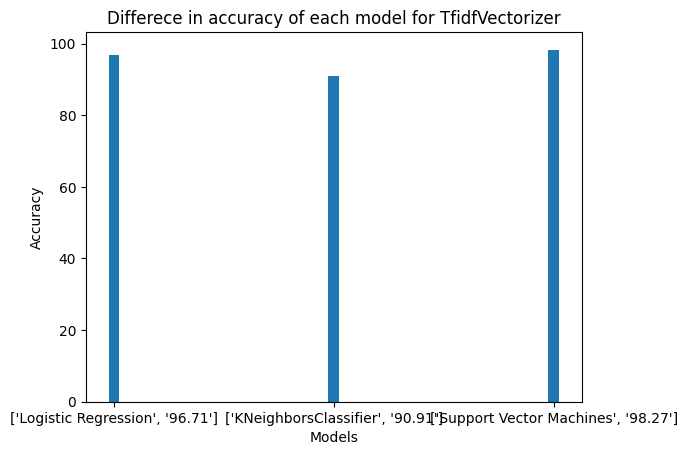

In [ ]:
LogisticRegression= accuracy_on_test_data*100
KNeighborsClassifier= accuracy_on_test_data1*100
svm = accuracy_on_test_data2*100

Accuracy = [LogisticRegression, KNeighborsClassifier , svm ]
X =[['Logistic Regression', f'{LogisticRegression:.2f}' ],['KNeighborsClassifier', f'{KNeighborsClassifier:.2f}'],['Support Vector Machines',f'{svm:.2f}']]

X_axis = np.arange(len(X))

plt.bar(X_axis, Accuracy, width = 0.05)

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Differece in accuracy of each model for TfidfVectorizer")
plt.show()

**Feature Extraction using Bag of words**

In [ ]:
feature_extraction = CountVectorizer(ngram_range=(2,2),stop_words='english',lowercase= True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
print(X_train_features)

  (0, 4641)	1
  (0, 6136)	1
  (0, 4022)	1
  (0, 16456)	1
  (0, 7190)	1
  (0, 8656)	1
  (1, 8243)	1
  (1, 19181)	1
  (1, 12854)	1
  (1, 9604)	1
  (1, 9851)	1
  (1, 11391)	1
  (1, 2112)	1
  (1, 10489)	1
  (1, 4869)	1
  (1, 18408)	1
  (1, 13)	1
  (1, 21135)	1
  (1, 11297)	1
  (1, 12890)	1
  (2, 5373)	1
  (2, 14175)	1
  (2, 6086)	1
  (2, 17293)	1
  (2, 8820)	1
  :	:
  (3897, 6522)	1
  (3898, 4971)	1
  (3898, 19445)	1
  (3898, 20233)	1
  (3898, 19080)	1
  (3898, 5677)	1
  (3898, 16836)	1
  (3898, 10302)	1
  (3898, 12401)	1
  (3898, 15556)	1
  (3898, 10095)	1
  (3899, 20355)	1
  (3899, 417)	1
  (3899, 6613)	1
  (3899, 17226)	1
  (3899, 17363)	1
  (3899, 15396)	1
  (3899, 17360)	1
  (3899, 20405)	1
  (3899, 15386)	1
  (3899, 6617)	1
  (3899, 16041)	1
  (3899, 834)	1
  (3899, 20369)	1
  (3899, 16670)	1


In [ ]:
from sklearn.linear_model import LogisticRegression
bag_of_word_model = LogisticRegression()

In [ ]:
bag_of_word_model.fit(X_train_features, Y_train)

LogisticRegression()

In [ ]:
prediction_on_train_data_of_bag_of_word_model = bag_of_word_model.predict(X_train_features)
accuracy_on_train_data_of_bag_of_word_model = accuracy_score(Y_train, prediction_on_train_data_of_bag_of_word_model)

In [ ]:
print('Accuracy on train data : ', accuracy_on_train_data_of_bag_of_word_model)

Accuracy on train data :  0.9933333333333333


In [ ]:
prediction_on_test_data_of_bag_of_word_model = bag_of_word_model.predict(X_test_features)
accuracy_on_test_data_of_bag_of_word_model= accuracy_score(Y_test, prediction_on_test_data_of_bag_of_word_model )

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data_of_bag_of_word_model)

Accuracy on test data :  0.9366028708133971


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
bag_of_word_model1= KNeighborsClassifier()

In [ ]:
bag_of_word_model1.fit(X_train_features, Y_train)

KNeighborsClassifier()

In [ ]:
prediction_on_train_data_of_bag_of_word_model1 = bag_of_word_model1.predict(X_train_features)
accuracy_on_train_data_of_bag_of_word_model1 = accuracy_score(Y_train, prediction_on_train_data_of_bag_of_word_model1)


In [ ]:
print('Accuracy on train data : ',accuracy_on_train_data_of_bag_of_word_model1)

Accuracy on train data :  0.9053846153846153


In [ ]:
prediction_on_test_data_of_bag_of_word_model1 = bag_of_word_model1.predict(X_test_features)
accuracy_on_test_data_of_bag_of_word_model1 = accuracy_score(Y_test, prediction_on_test_data_of_bag_of_word_model1)

In [ ]:
print('Accuracy on test data : ',accuracy_on_test_data_of_bag_of_word_model1)

Accuracy on test data :  0.8851674641148325


In [ ]:
from sklearn import svm
bag_of_word_model2= svm.SVC()

In [ ]:
bag_of_word_model2.fit(X_train_features, Y_train)

SVC()

In [ ]:
prediction_on_train_data_of_bag_of_word_model2 = bag_of_word_model1.predict(X_train_features)
accuracy_on_train_data_of_bag_of_word_model2 = accuracy_score(Y_train, prediction_on_train_data_of_bag_of_word_model2)


In [ ]:
print('Accuracy on train data : ',accuracy_on_train_data_of_bag_of_word_model2)

Accuracy on train data :  0.9053846153846153


In [ ]:
prediction_on_test_data_of_bag_of_word_model2  = bag_of_word_model2.predict(X_test_features)
accuracy_on_test_data_of_bag_of_word_model2= accuracy_score(Y_test,prediction_on_test_data_of_bag_of_word_model2)

In [ ]:
print('Accuracy on test data : ', accuracy_on_test_data_of_bag_of_word_model2)

Accuracy on test data :  0.93122009569378


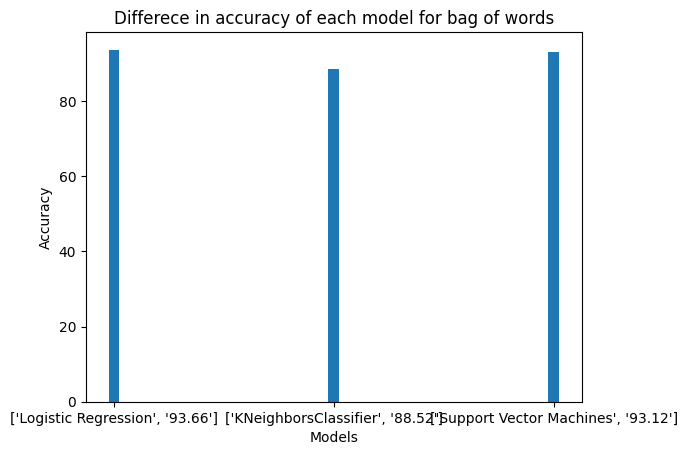

In [ ]:

LogisticRegression = accuracy_on_test_data_of_bag_of_word_model*100
KNeighborsClassifier= accuracy_on_test_data_of_bag_of_word_model1*100
svm = accuracy_on_test_data_of_bag_of_word_model2*100

Accuracy = [LogisticRegression, KNeighborsClassifier , svm ]
X =[['Logistic Regression', f'{LogisticRegression:.2f}' ],['KNeighborsClassifier', f'{KNeighborsClassifier:.2f}'],['Support Vector Machines',f'{svm:.2f}']]

X_axis = np.arange(len(X))

plt.bar(X_axis, Accuracy, width = 0.05)

plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Differece in accuracy of each model for bag of words")
plt.show()